In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = sw.EigenM(fast=45,lag=1.5,delta=0.02,noise=0.05)

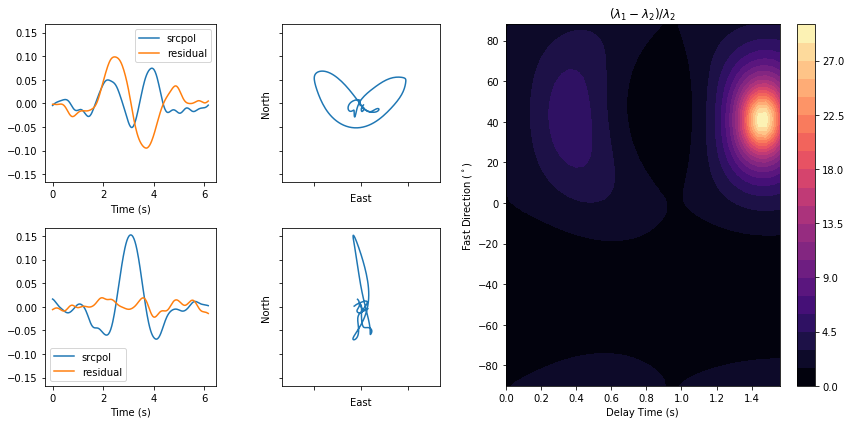

In [3]:
a.plot()

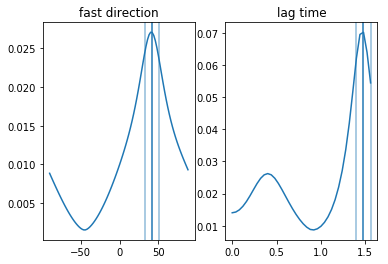

In [4]:
# Error analysis
fig,ax = plt.subplots(2)
ax0 = plt.subplot(121)
ax1 = plt.subplot(122)

ax0.plot(a.degs[0,:],a.fastprofile())
ax0.axvline(a.fast)
ax0.axvline(a.fast-2*a.dfast,alpha=0.5)
ax0.axvline(a.fast+2*a.dfast,alpha=0.5)
ax0.set_title('fast direction')

ax1.plot(a.lags[:,0],a.lagprofile())
ax1.axvline(a.lag)
ax1.axvline(a.lag-2*a.dlag,alpha=0.5)
ax1.axvline(a.lag+2*a.dlag,alpha=0.5)
ax1.set_title('lag time')

plt.show()

In [5]:
pr = sw.Pair(fast=45,lag=1.5,delta=0.05,noise=0.05)
bs = sw.eigval.Bootstrap(pr,nits=10)

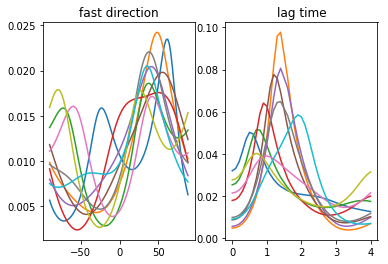

In [6]:
# Error analysis
fig,ax = plt.subplots(2)
ax0 = plt.subplot(121)
ax1 = plt.subplot(122)

for a in bs.listM:
    ax0.plot(a.degs[0,:],a.fastprofile())
    ax1.plot(a.lags[:,0],a.lagprofile())
    
# ax0.axvline(a.fast)
# ax0.axvline(a.fast-2*a.dfast,alpha=0.5)
# ax0.axvline(a.fast+2*a.dfast,alpha=0.5)
ax0.set_title('fast direction')

# ax1.axvline(a.lag)
# ax1.axvline(a.lag-2*a.dlag,alpha=0.5)
# ax1.axvline(a.lag+2*a.dlag,alpha=0.5)
ax1.set_title('lag time')

plt.show()

In [7]:
bs.listM[0].fastprofile().sum()

1.0

# Distributions in Parameter Space

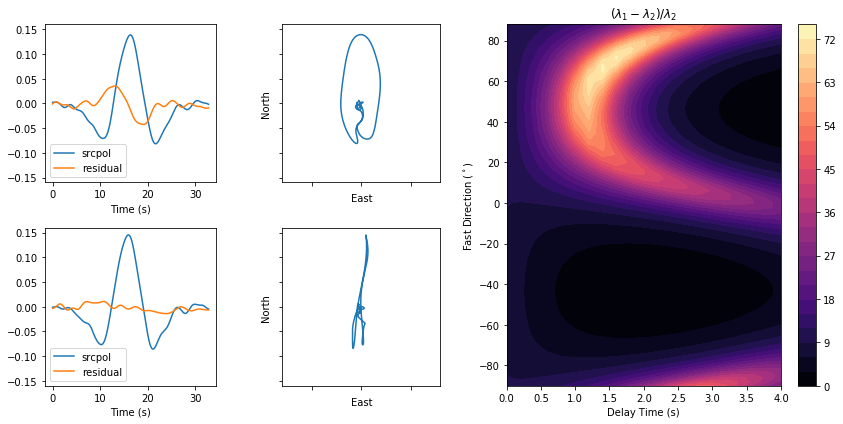

In [8]:
a = sw.EigenM(noise=0.04,fast=30,lag=1.2,delta=0.1,lags=(4,))
a.plot()

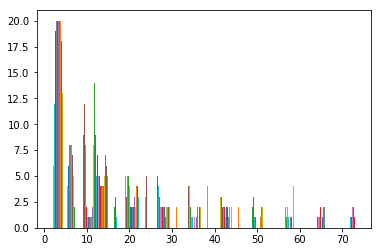

In [14]:

# # lam1
# plt.hist(a.lam1)
# plt.show()

# # lam2
# plt.hist(a.lam2)
# plt.show()

# lam1 / lam2
plt.hist(a.lam1/a.lam2)
plt.show()
